# Energy Conservation in The Restricted Circular Three-Body Problem: #2

Joseph Godoy | Computational Physics | Semester Project | 2018

This notebook will explore energy conservation in a model of free-return circumlunar cycler orbits.

---

**Background**

This notebook is much like the previous notebook, but the trajectory is generated with a slight difference in initial velocity. For more information on orbits of this type, see Buzz Aldrin and Anthony Genova's paper, ["Circumlunar Free-Return Cycler Orbits For A Manned Earth-Moon Space Station"](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20160004674.pdf).

By increasing the launch velocity from 3.14 to 3.16, we get access to a very different qualitative regime.

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
import ode
import seaborn

# Style options: Seaborn graph scheme, inline plots, serif fonts.

seaborn.set()
%matplotlib inline
font = {'family': 'serif','color':  'black', 'weight': 'normal','size': 16,}

def initial_conditions(initial_height, initial_theta, reduced_mass, kick_velocity):
    V = np.sqrt((1.0 - reduced_mass)/initial_height) + kick_velocity
    state_vector = np.asarray([0.0,0.0,0.0,0.0])
    state_vector[0] = initial_height*np.cos(initial_theta) - reduced_mass # x
    state_vector[1] = initial_height*np.sin(initial_theta)                # y
    state_vector[2] = -1.0 * V * np.sin(initial_theta) + state_vector[1]  # x-dot
    state_vector[3] = V * np.cos(initial_theta) - state_vector[0]         # y-dot
    return state_vector

def model(state_vector, t):
    mu = reduced_mass
    A  = (state_vector[0] + mu)
    B  = (state_vector[0] - 1.0 + mu)
    c  = 2.0
    C  = (1 - mu)
    R1 = ((A**2)+(state_vector[1]**2))**(3.0/2.0)
    R2 = ((B**2)+(state_vector[1]**2))**(3.0/2.0)
    derivative_vector = np.asarray([0.0,0.0,0.0,0.0])
    derivative_vector[0] = state_vector[2]                                                 # vx
    derivative_vector[1] = state_vector[3]                                                 # vy
    derivative_vector[2] = (c*state_vector[3])+state_vector[0]-((A*C)/R1)-((B*mu)/R2)      # ax
    derivative_vector[3] = (-1.0*c*state_vector[2])+(state_vector[1]*(1.0-(C/R1)-(mu/R2))) # ay
    return derivative_vector

potential = lambda M, r : - 6.67408 * M / r

In [19]:
## Main system parameters ##

earth_mass   = 5.972E24               # Mass of earth
moon_mass    = 7.348E22               # Mass of moon
total_mass   = earth_mass + moon_mass # Total mass of system
E_to_M       = 3.844E5                # Distance to moon
R_Earth      = 6371/E_to_M            # Radius of Earth
R_Moon       = 1737/E_to_M            # Radius of moon
offset       = 0/E_to_M               # Choose height above radius of Earth
reduced_mass = moon_mass/total_mass   # Order of unity for dimensional form
orbital_radius = R_Earth + offset     # Orbital radius
launch_angle = 226.81*(np.pi/180)     # Launch angle
ejection_velocity_2 = 3.16            # Ejection velocity
mu = reduced_mass

## Initial conditions ##

state_vector_2 = initial_conditions(orbital_radius,launch_angle,reduced_mass,ejection_velocity_2)
time_array_2, x_array_2, y_array_2, vx_array_2, vy_array_2 = [0.0], [state_vector_2[0]], [state_vector_2[1]],[state_vector_2[2]],[state_vector_2[3]]

## Simulation time and interval parameters ##

time            = 0.0
simulation_time = 20          # Only for iterating with time-based constraints
N               = 100000      # Number of intervals: for best results, keep N => 100000.
time_step       = 1.0/N  

while time < simulation_time:
   
    x_array_2.append(state_vector_2[0]) 
    y_array_2.append(state_vector_2[1]) 
    vx_array_2.append(state_vector_2[2])
    vy_array_2.append(state_vector_2[3])
    time_array_2.append(time)
    new_state_vector_2 = ode.RK4(model, state_vector_2, time, time_step) 

    for i in range(len(new_state_vector_2)): 
        state_vector_2[i] = new_state_vector_2[i] 

    time += time_step 

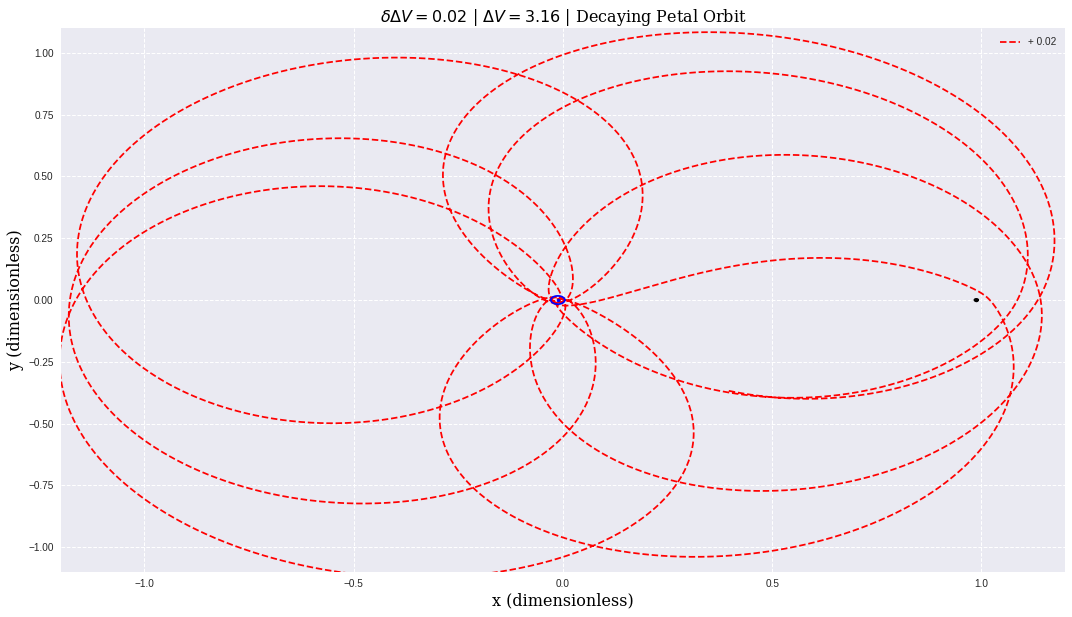

In [20]:
phi = np.linspace(0,2*np.pi,100)
plt.figure(figsize=(18,10))
plt.title("$\delta \Delta V = 0.02$ | $\Delta V = 3.16$ | Decaying Petal Orbit", fontdict = font)
plt.xlabel("x (dimensionless)", fontdict = font)
plt.ylabel("y (dimensionless)", fontdict = font)
plt.plot(x_array_2, y_array_2, 'r--', label = '+ 0.02')
plt.plot(R_Earth*np.cos(phi)-reduced_mass,R_Earth*np.sin(phi),'b-',-mu,0, 'b.')
plt.plot(R_Moon*np.cos(phi)+(1-reduced_mass),R_Moon*np.sin(phi), 'k-',(1-mu),0, 'k.')
plt.grid(linestyle = '--')
plt.ylim(-1.1,1.1)
plt.xlim(-1.2,1.2)
plt.legend()

This slight variation (<1% of the original velocity) results in a cycler orbit, rather than a moon landing.

Note the emergence of "petals" centered around the Earth. Low interval counts cause these petals to shrink into to the earth due to numerical errors.

<Figure size 432x288 with 0 Axes>

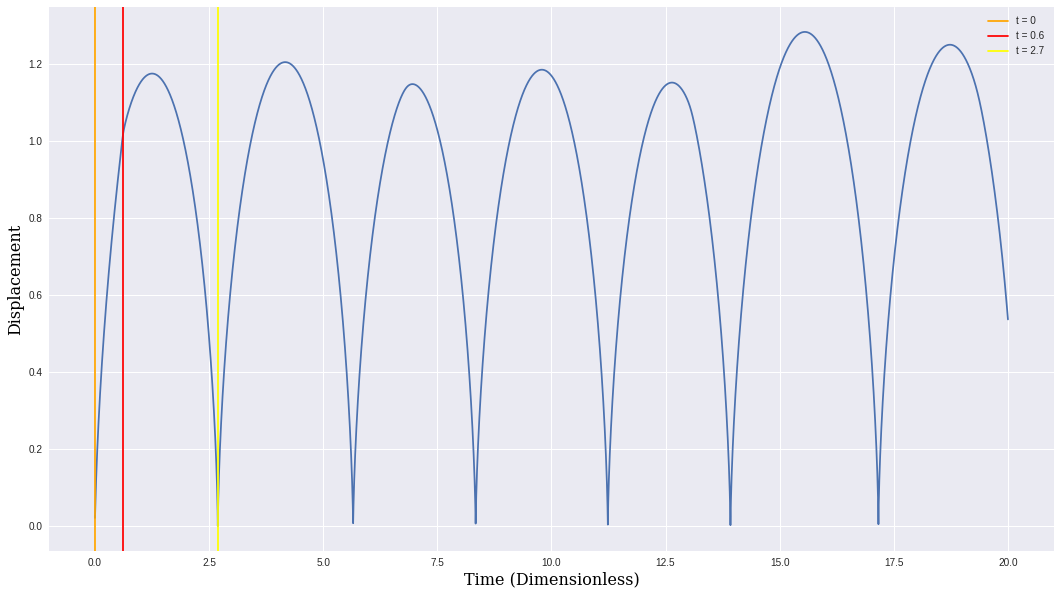

In [21]:
plt.figure()
plt.figure(figsize=(18,10))
plt.plot(time_array_2, np.sqrt(np.asarray(x_array_2)**2+np.asarray(y_array_2)**2))
plt.xlabel("Time (Dimensionless)", fontdict = font)
plt.ylabel("Displacement", fontdict = font)
plt.axvline(x=0, label = "t = 0", color = "orange")
plt.axvline(x=0.61, label = "t = 0.6", color = "red")
plt.axvline(x=2.69, label = "t = 2.7", color = "yellow")
plt.legend()

Text(0,0.5,'Energy (Dimensionless)')

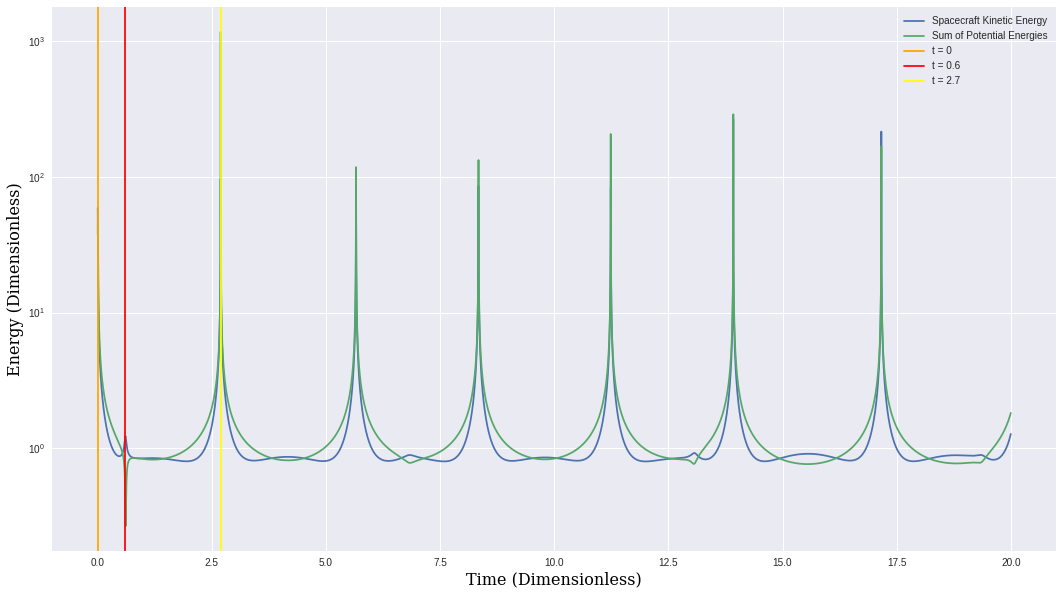

In [22]:
plt.figure(figsize=(18,10))
plt.semilogy(time_array_2, 1.0/2.0 * np.sqrt(np.asarray(vx_array_2)**2 + np.asarray(vy_array_2)**2)**2, label = 'Spacecraft Kinetic Energy') #ke
plt.semilogy(time_array_2, np.abs((earth_mass/total_mass) / np.sqrt((np.asarray(x_array_2))**2 + (np.asarray(y_array_2)**2))-(moon_mass/total_mass) / np.sqrt((1.0 - np.asarray(x_array_2))**2 + (np.asarray(y_array_2)**2))), label = 'Sum of Potential Energies')
plt.axvline(x=0, label = "t = 0", color = "orange")
plt.axvline(x=0.6, label = "t = 0.6", color = "red")
plt.axvline(x=2.692, label = "t = 2.7", color = "yellow")
plt.legend()
plt.xlabel("Time (Dimensionless)", fontdict = font)
plt.ylabel("Energy (Dimensionless)", fontdict = font)

When we make plots similar to the ones in the previous notebook, we find a recurring, periodic pattern in the injection of energy into our system. This takes place in three major steps marked by colored lines:

* The craft accelerates away from the earth. (orange)
* The craft accelerates around and past the moon. (red)
* The craft accelerates, getting close to the Earth before slingshotting around it. (yellow)

---

**Analysis**

Upon closer inspection, the biggest anomalies in energy appear to take place when the craft is accelerating.
There are two components to this: floating point and general computational instability in the Runge-Kutta 4 integrator, and the fictitious forces that were glossed over briefly in the introduction.

To address the first component, Runge-Kutta integrators can be very unstable for long-time simulations. Much of the error is accrued when the most change is ocurring. Increasing your time-step is a brute-force solution to this problem, but is computationally expensive. Alternatively, a variable time-step that kicks in close to the masses has the potential to be both effective and efficient.

Secondly, the expectation that mechanical energy ought to be conserved in this system under a rotating reference frame is misguided. 

The gravitational forces at work here are conservative, meaning that the forces can be expressed as the gradients of some scalar potential functions $F_\alpha = -\nabla U_\alpha$. However, the fictitious (Coriolis and centrifugal) forces are *velocity-dependent*, or in other words, cannot be expressed as gradients of scalar potential functions and do not conserve mechanical energy.